In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv('zeroopenpowerlifting.csv')

In [50]:
data

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.80,60,80.0,...,290.0,4,324.16,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.50,60,100.0,...,332.5,2,378.07,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.40,56,0.0,...,32.5,1,38.56,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.00,60,0.0,...,310.0,3,345.61,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.00,110,120.0,...,390.0,3,321.25,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767667,Devin Major,M,SBD,Wraps,24.5,24-34,int,73.03,75,0.0,...,540.0,1,392.12,392.12,379.31,579.67,Yes,USA,NASA,2019-10-19
767668,Alfredo Tatum,M,BD,Raw,21.5,20-23,jr,84.10,90,0.0,...,421.0,1,278.86,281.65,268.08,NaN,Yes,USA,NASA,2019-10-19
767669,Ben Sherwood,M,BD,Raw,30.0,24-34,sm1,82.19,82.5,0.0,...,402.5,1,270.25,270.25,260.08,NaN,Yes,USA,NASA,2019-10-19
767670,Coby Carden,M,BD,Raw,62.5,60-64,m3,93.03,100,0.0,...,400.0,1,251.24,349.97,240.46,NaN,Yes,USA,NASA,2019-10-19


In [71]:
data['Squat3Kg'].value_counts()[0]
#Squat 3 Fail rate 590645/767671 = 76.9%

590645

In [52]:
data['Bench3Kg'].value_counts()[0]
#Bench 3 Fail Rate 575411/767671 = 74.6%

575411

In [53]:
data['Deadlift3Kg'].value_counts()[0]
#Deadlift 3 Fail Rate 590523/767671 = 74.9%

590523

In [54]:
#Set classes
conditions = [
    (data['Sex'] == 'M') & (data['BodyweightKg'] < 59),
    (data['Sex'] == 'F') & (data['BodyweightKg'] < 47),
    (data['Sex'] == 'M') & (59 < data['BodyweightKg']) & (data['BodyweightKg'] < 66),
    (data['Sex'] == 'F') & (47 < data['BodyweightKg']) & (data['BodyweightKg'] < 52),
    (data['Sex'] == 'M') & (66 < data['BodyweightKg']) & (data['BodyweightKg'] < 74),
    (data['Sex'] == 'F') & (52 < data['BodyweightKg']) & (data['BodyweightKg'] < 57),
    (data['Sex'] == 'M') & (74 < data['BodyweightKg']) & (data['BodyweightKg'] < 83),
    (data['Sex'] == 'F') & (57 < data['BodyweightKg']) & (data['BodyweightKg'] < 63),
    (data['Sex'] == 'M') & (83 < data['BodyweightKg']) & (data['BodyweightKg'] < 93),
    (data['Sex'] == 'F') & (63 < data['BodyweightKg']) & (data['BodyweightKg'] < 72),
    (data['Sex'] == 'M') & (93 < data['BodyweightKg']) & (data['BodyweightKg'] < 105),
    (data['Sex'] == 'F') & (72 < data['BodyweightKg']) & (data['BodyweightKg'] < 84),
    (data['Sex'] == 'M') & (105 < data['BodyweightKg']) & (data['BodyweightKg'] < 120),
    (data['Sex'] == 'F') & (84 < data['BodyweightKg']),
    (data['Sex'] == 'M') & (120 < data['BodyweightKg']),
]

choices = ['59', '47', '66', '52', '74', '57', '83', '63', '93', '72', '105', '84', '120', '84+', '120+']

data['WeightClassKg'] = np.select(conditions, choices, default='Help')

In [55]:
failrate_M = []
failrate_F = []

In [56]:
#generate male failrates
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '59') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '59')].count()['Name']
int3 = (int1/int2)*100
failrate_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '66') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '66')].count()['Name']
int3 = (int1/int2)*100
failrate_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '74') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '74')].count()['Name']
int3 = (int1/int2)*100
failrate_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '83') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '83')].count()['Name']
int3 = (int1/int2)*100
failrate_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '93') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '93')].count()['Name']
int3 = (int1/int2)*100
failrate_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '105') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '105')].count()['Name']
int3 = (int1/int2)*100
failrate_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120')].count()['Name']
int3 = (int1/int2)*100
failrate_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120+') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120+')].count()['Name']
int3 = (int1/int2)*100
failrate_M.append(int3)

#generate female failrates
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '47') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '47')].count()['Name']
int3 = (int1/int2)*100
failrate_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '52') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '52')].count()['Name']
int3 = (int1/int2)*100
failrate_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '57') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '57')].count()['Name']
int3 = (int1/int2)*100
failrate_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '63') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '63')].count()['Name']
int3 = (int1/int2)*100
failrate_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '72') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '72')].count()['Name']
int3 = (int1/int2)*100
failrate_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84')].count()['Name']
int3 = (int1/int2)*100
failrate_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84+') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84+')].count()['Name']
int3 = (int1/int2)*100
failrate_F.append(int3)


In [57]:
failrate_M

[20.40739343643908,
 24.11596570028583,
 23.1154196122349,
 21.811548223350254,
 23.18773715480147,
 21.36560102058303,
 18.52109411219286,
 17.42821711342173]

In [58]:
failrate_F

[24.581245526127415,
 25.208310187756915,
 27.129964616546737,
 28.350769409105396,
 28.62619238655612,
 28.848241424229265,
 31.747421307045254]

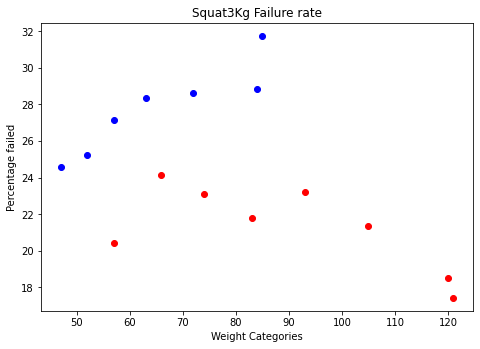

In [80]:
male_cats = [57,66,74,83,93,105,120,121]
female_cats = [47,52,57,63,72,84,85]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(male_cats, failrate_M, color = 'r')
ax.scatter(female_cats, failrate_F, color = 'b')
ax.set_ylabel('Percentage failed')
ax.set_xlabel('Weight Categories')
ax.set_title('Squat3Kg Failure rate')
plt.show()

In [ ]:
#This doesn't seem to match the overal percentages failed.
#Is anyone able to spot an issue with the way I've structured the code?